## Difference between Bagging and Random Forest(RF)

### Base Learners in Bagging:

1. **Flexibility in Base Learner Selection:**

* In Bagging(Bootstrap Aggregating), the term **"base learner"** refers to the individual models or classifiers used within the ensemble.
* Bagging is a general ensemble method that can work with various types of base learners, such as **decision trees, support vector machines(SVM), neural networks, k-nearest neighbours (KNN)**, and more.
* The choice of base learner depends on the specific problem domain, the characterstics of the data, and the performance requirements.

### Base Learners in Random Forest:

1. **Specific use of Decision Trees:**

* Random Forest is an extension of Bagging that focuses only on using **decision trees** as the base learners.
* Random Forest exclusively employs decision trees due to their simplicity, interpretability and effectiveness in capturing complex relationship in the data.

### One Most important Question aries:

#### Ques: Does this means if i use Decision Tree to construct a Bagging model, it become a Random Forest?

If you think deeply, the answer is **No**.

Why?

Let's delve further.

### Feature Selection in Bagging:

2. **Random Subset of Features for Each Base Learner:**

* In Bagging, each base learner (e.g., decision tree) is trained on a random subset of features selected from the original feature set.
* This random selection of features helps introduce diversity among the base learners, as different subsets of features are considered during training.
* By training on different subset of features, the base learners learn to focus on different aspects of the data, leading to a more diverse set of models.

### Feature Selection in Random Forest:

2. **Random Subset of Features for Each Decision Tree:**

* Similiar to Bagging, Random Forest also selects a random subset of features for each decision tree. However, it takes this concept a step further.
* In Random Forest, at each node split of a decision tree, a random subset of features is considered for determining the best split.
* This process of randomly selecting featuring at each node split helps decorrelate the trees from each other.
* As a result, the decision trees in a Random Forest tends to be more diverse compared to those in traditinal Bagging, where the same subset of features may be considered for all nodes splits.


Let's explore these in detail with real-life dataset.

### Problem Statement

Predict next-day rain by training classification models on the target variable Rain Tomorrow.

We can read the data back preprocessed datasets for training, validation and testing using `pd.read_parquet`, where the following data preparation steps have been performed:

* Splitting a dataset into taining, validation & test sets.
* Filling/imputing missing values in numeric columns.
* Scaling numeric features to a (0,1) range.
* Encoding categorical columns as one-hot vectors.

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [7]:
train_x= pd.read_parquet("test_inputs.parquet")
train_y = pd.read_parquet('test_targets.parquet')["RainTomorrow"]

In [8]:
print("train_inputs:", train_x.shape)
print("train_targets:", train_y.shape)

train_inputs: (2591, 123)
train_targets: (2591,)


In [9]:
numeric_cols= train_x.select_dtypes(include= np.number).columns.tolist()

In [10]:
x= train_x[numeric_cols]

In [12]:
train_inputs, test_inputs, train_target, test_target= train_test_split(x, train_y, test_size=0.4, random_state=42)

In [13]:
print("train_inputs:", train_inputs.shape)
print("train_targets:", train_target.shape)

print("test_inputs:", test_inputs.shape)
print("test_targets:", test_target.shape)

train_inputs: (1554, 118)
train_targets: (1554,)
test_inputs: (1037, 118)
test_targets: (1037,)


### Feature Selection in Bagging:

In [17]:
rsub= BaggingClassifier(max_features=2, 
                       bootstrap_features=True,
                       random_state=42, 
                       verbose=1, 
                       n_jobs= -1)

In [19]:
rsub.fit(train_inputs, train_target)
y_pred= rsub.predict(test_inputs)
print("Random Subspaces using Bagging", accuracy_score(test_target, y_pred))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Random Subspaces using Bagging 0.7521697203471552


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    2.8s remaining:    2.8s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    2.8s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.0s finished


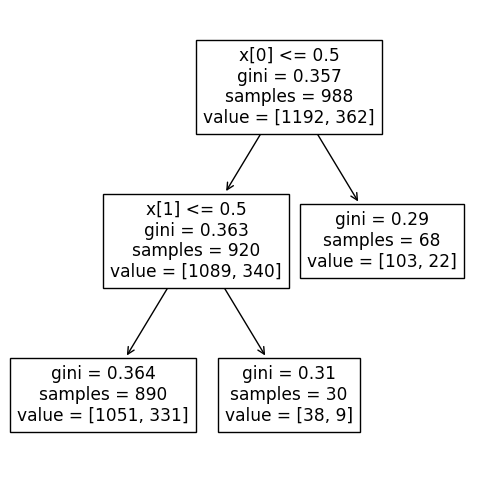

In [22]:
plt.figure(figsize=(6,6))
plot_tree(rsub.estimators_[0])
plt.show()

After using `max_sample = 2`, the tree uses only 2 columns = (0,1) . i.e. **Tree Level Column Sampling**.

### Feature Selection in Random Forest:

In [23]:
rf= RandomForestClassifier(max_features=2, max_depth= 3, random_state=42, verbose= 1, n_jobs= -1)

In [24]:
rf.fit(train_inputs, train_target)
y_pred= rf.predict(test_inputs)
print("Random Subspaces using Random Forest", accuracy_score(test_target, y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s


Random Subspaces using Random Forest 0.7521697203471552


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


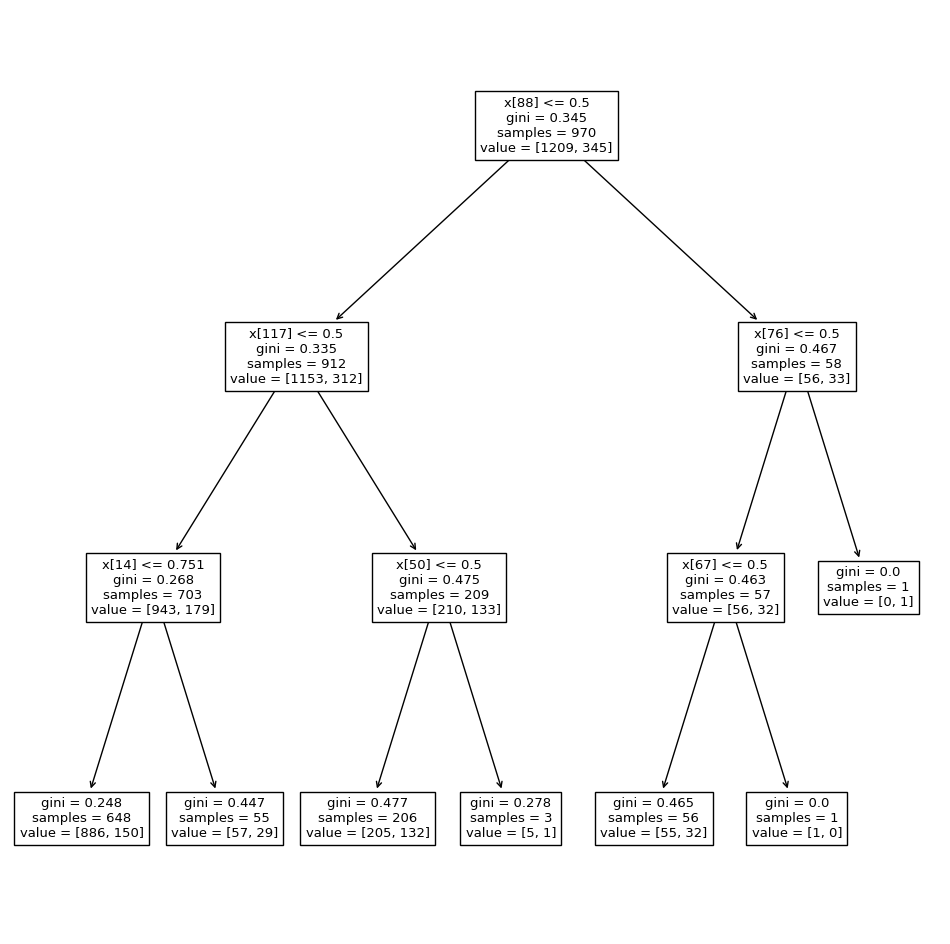

In [25]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()

After using `max_sample = 2`, the tree uses only 2 but random columns i.e. **Node Level Column Sampling**.

### Conclusion

Both Bagging and Random Forest leverage the concepts of feature selection to introduce diversity among base learners.

While Bagging randomly selects features for each base learner, Random Forest goes a step further by decorrelating trees through random feature selection at each node split.

This decoration helps mitigate overfitting and improves the generalization performance of the ensemble models, making Random Forest a powerful algorithm for various machine learning tasks.